<a href="https://colab.research.google.com/github/cameron-larkin/Machine_learning_Chelsea/blob/main/Chelsea_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('Chelsea.csv')

In [3]:
# transfer fee column is named 'Value'
transfer_fees = df['Value']

In [4]:
# Basic statistics
mean_transfer_fee = transfer_fees.mean()
median_transfer_fee = transfer_fees.median()
std_transfer_fee = transfer_fees.std()
q1_transfer_fee = transfer_fees.quantile(0.25)
q3_transfer_fee = transfer_fees.quantile(0.75)

# Display the results
print(f"Mean Transfer Fee: {mean_transfer_fee}")
print(f"Median Transfer Fee: {median_transfer_fee}")
print(f"Standard Deviation of Transfer Fee: {std_transfer_fee}")
print(f"1st Quartile (Q1) Transfer Fee: {q1_transfer_fee}")
print(f"3rd Quartile (Q3) Transfer Fee: {q3_transfer_fee}")

Mean Transfer Fee: 55566666.666666664
Median Transfer Fee: 52500000.0
Standard Deviation of Transfer Fee: 31880902.653830055
1st Quartile (Q1) Transfer Fee: 32000000.0
3rd Quartile (Q3) Transfer Fee: 73750000.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Load the dataset
df = pd.read_csv('Chelsea.csv')

In [ ]:
# Assuming the transfer fee column is named 'Value'
transfer_fees = df['Value']

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

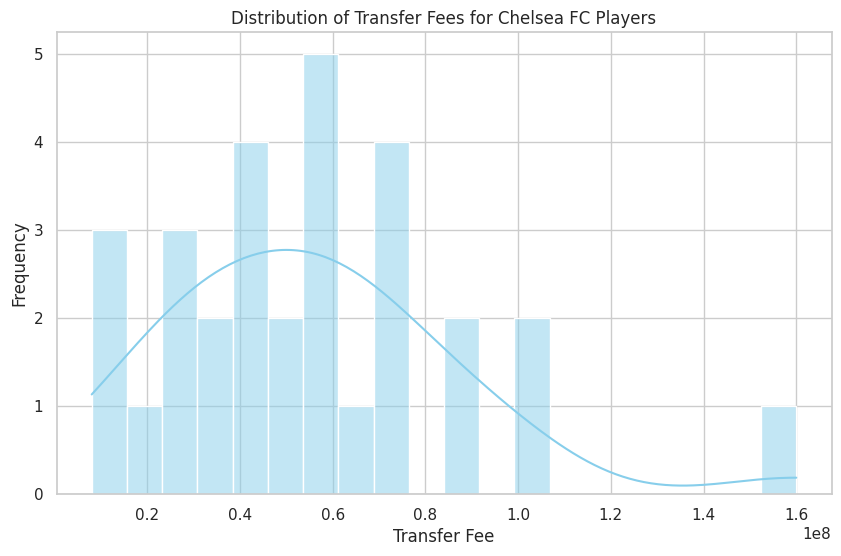

In [ ]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(transfer_fees, kde=True, color='skyblue', bins=20)
plt.title('Distribution of Transfer Fees for Chelsea FC Players')
plt.xlabel('Transfer Fee')
plt.ylabel('Frequency')
plt.show()

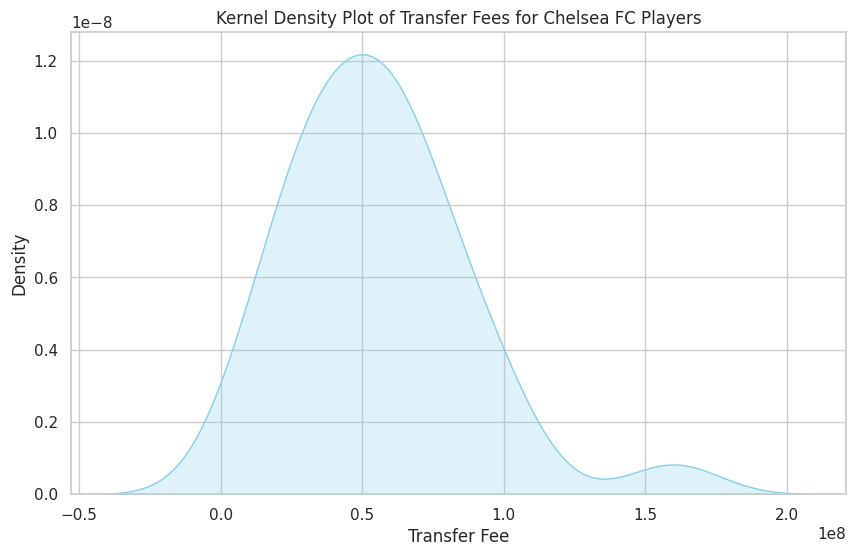

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(transfer_fees, color='skyblue', fill=True)
plt.title('Kernel Density Plot of Transfer Fees for Chelsea FC Players')
plt.xlabel('Transfer Fee')
plt.ylabel('Density')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('Chelsea.csv')

In [ ]:
# Select relevant numerical features
numerical_features = df[['Value', 'Age', 'Gls', 'Ast', 'xG', 'npxG', 'xAG']]

In [ ]:
# Compute correlation matrix
correlation_matrix = numerical_features.corr()

In [ ]:
# Set up the plotting style
sns.set(style="white")

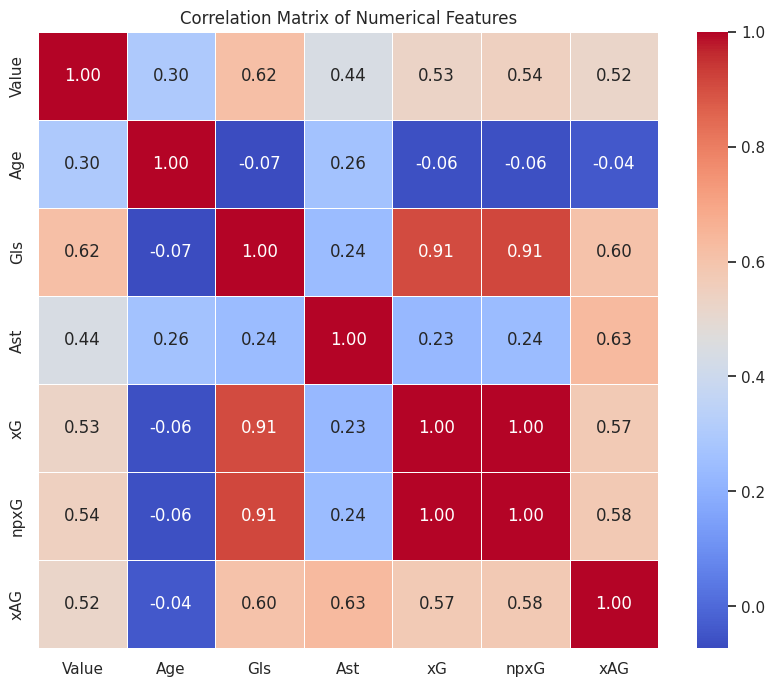

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
selected_features = ['Age', 'Gls', 'Ast', 'xG', 'npxG', 'xAG']

In [ ]:
sns.set(style="whitegrid")

In [ ]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

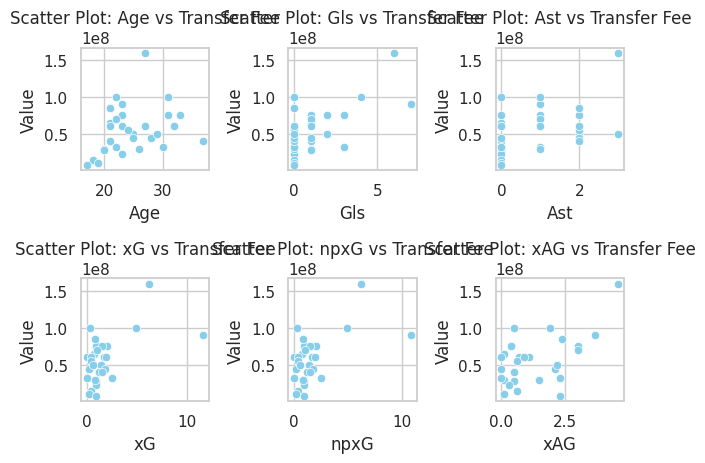

In [ ]:
for feature in selected_features:
    plt.subplot(2, 3, selected_features.index(feature) + 1)
    sns.scatterplot(x=feature, y='Value', data=df, color='skyblue')
    plt.title(f'Scatter Plot: {feature} vs Transfer Fee')

plt.tight_layout()
plt.show()

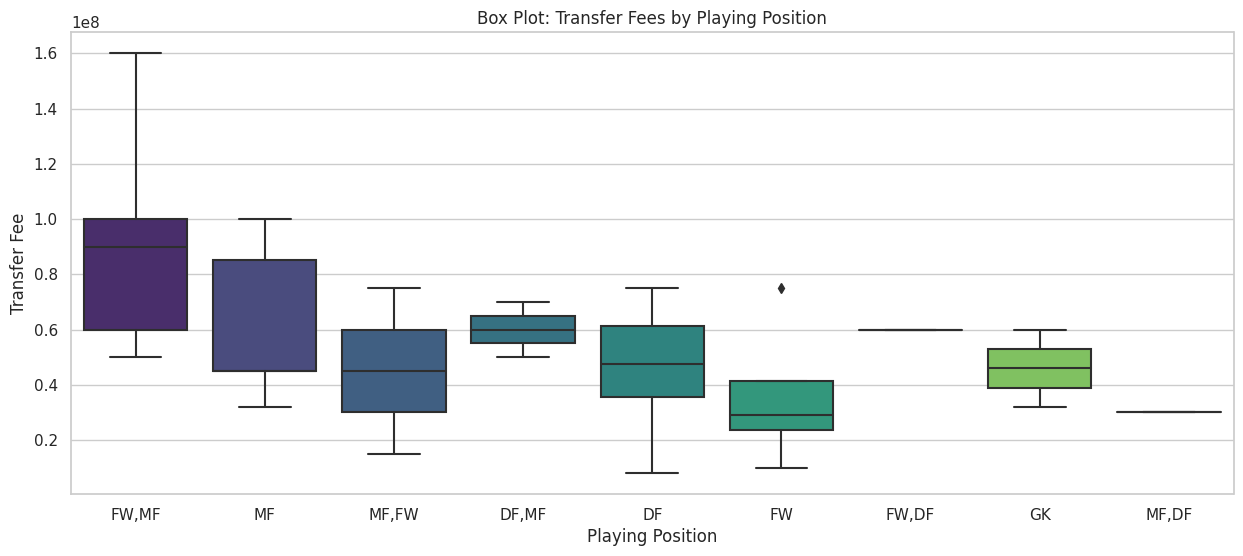

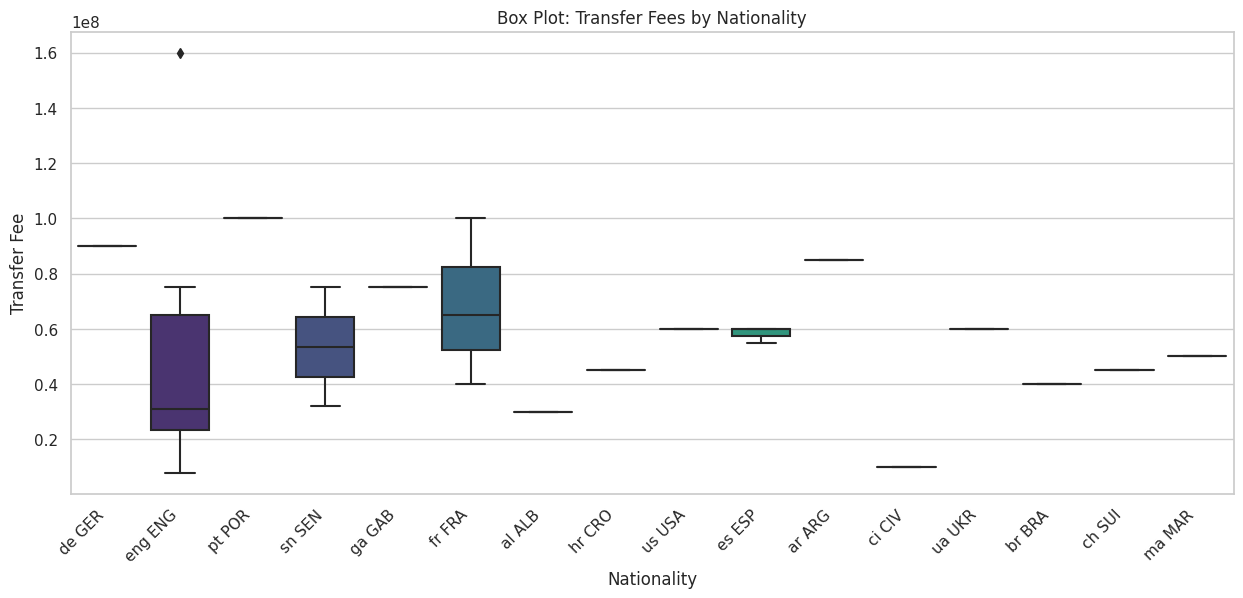

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create box plots for playing position
plt.figure(figsize=(15, 6))
sns.boxplot(x='Pos', y='Value', data=df, palette='viridis')
plt.title('Box Plot: Transfer Fees by Playing Position')
plt.xlabel('Playing Position')
plt.ylabel('Transfer Fee')
plt.show()

# Create box plots for nationality (assuming nationality column is named 'Nation')
plt.figure(figsize=(15, 6))
sns.boxplot(x='Nation', y='Value', data=df, palette='viridis')
plt.title('Box Plot: Transfer Fees by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Transfer Fee')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

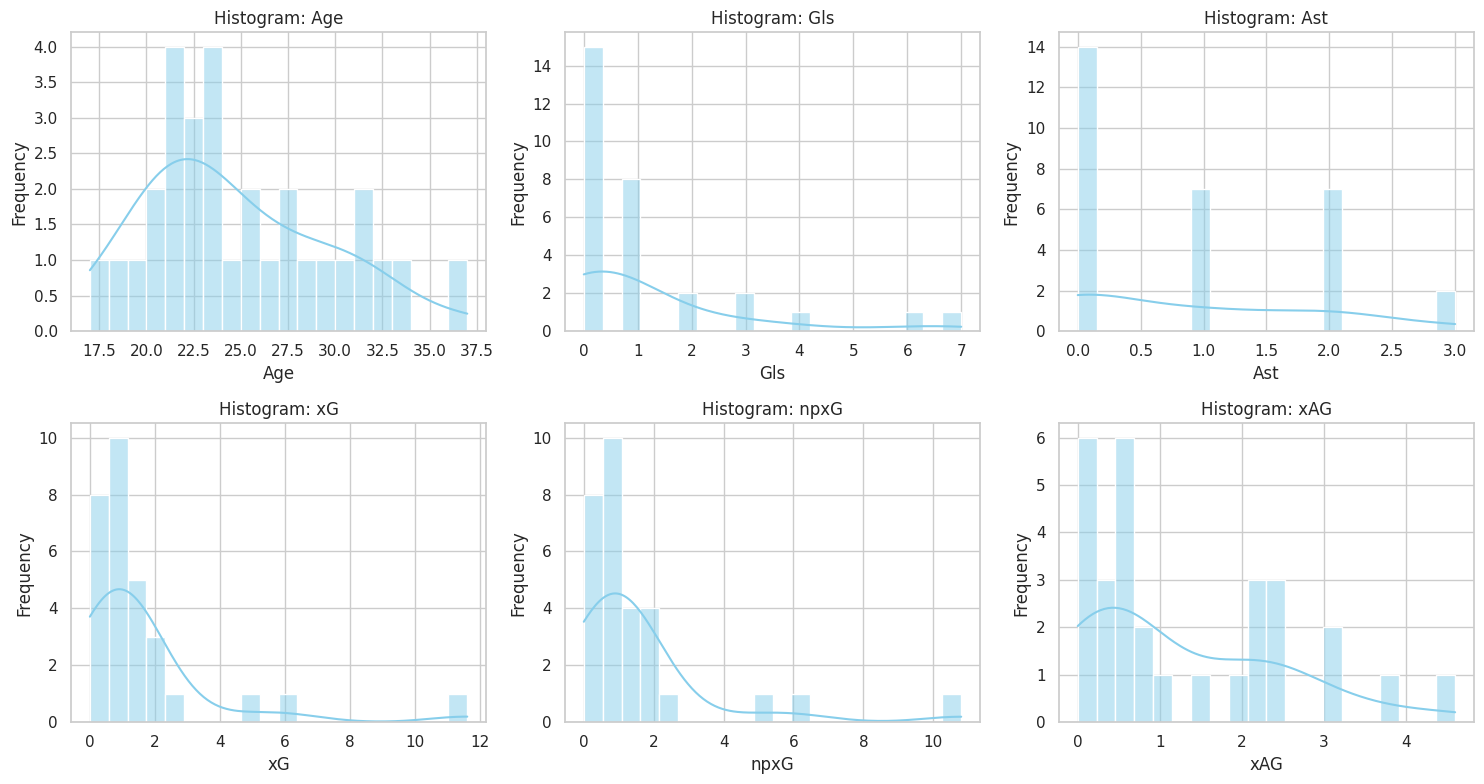

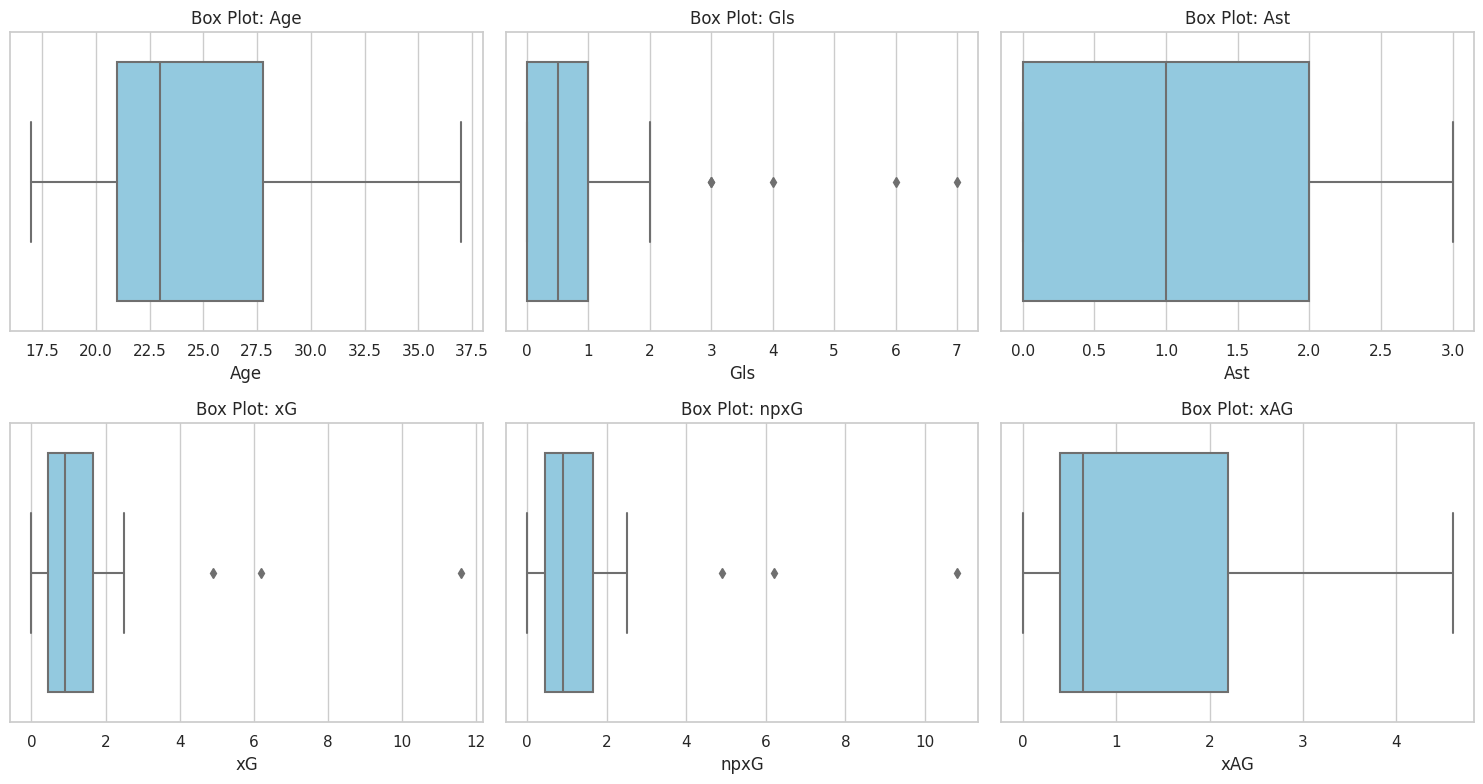

In [ ]:
selected_features = ['Age', 'Gls', 'Ast', 'xG', 'npxG', 'xAG']

# Set up the plotting style
sns.set(style="whitegrid")

# Create histograms
plt.figure(figsize=(15, 8))
for feature in selected_features:
    plt.subplot(2, 3, selected_features.index(feature) + 1)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(15, 8))
for feature in selected_features:
    plt.subplot(2, 3, selected_features.index(feature) + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot: {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

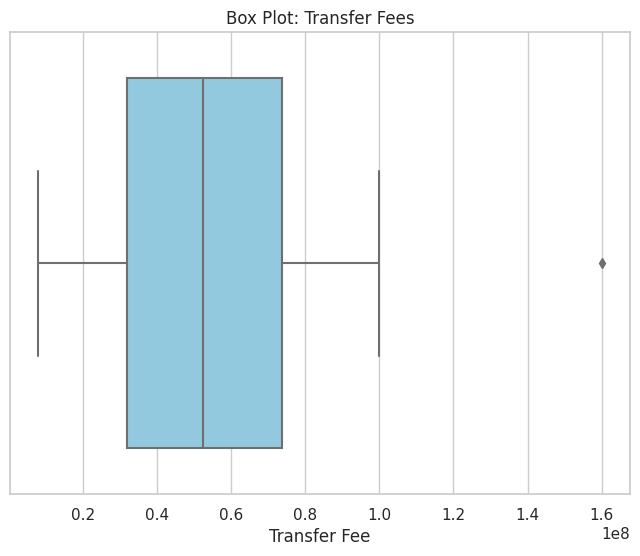

In [ ]:
sns.set(style="whitegrid")

# Investigate potential outliers in transfer fees using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Value', data=df, color='skyblue')
plt.title('Box Plot: Transfer Fees')
plt.xlabel('Transfer Fee')
plt.show()


In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for transfer fees
z_scores = zscore(df['Value'])

# Set a Z-score threshold for identifying outliers (e.g., 3 standard deviations)
outliers = df[abs(z_scores) > 3]

# Display identified outliers
print("Identified Outliers:")
print(outliers[['Player', 'Value']])

Identified Outliers:
            Player      Value
1  Raheem Sterling  160000000


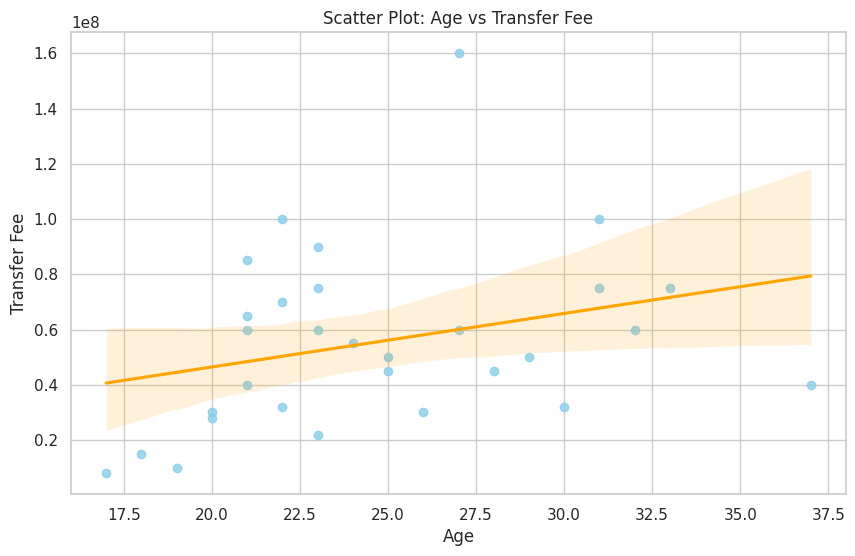

In [ ]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Value', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'orange'})
plt.title('Scatter Plot: Age vs Transfer Fee')
plt.xlabel('Age')
plt.ylabel('Transfer Fee')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Chelsea.csv')

# Define features (X) and target variable (y)
# For this example, let's use 'Age' as the feature and 'Value' as the target variable
X = df[['Age']]
y = df['Value']

# Split the data into training and testing sets
# The test_size parameter specifies the proportion of the dataset to include in the test split
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 24
Testing set size: 6


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('Chelsea.csv')

# Define features (X) and target variable (y)
# For this example, let's use 'Age' as the feature and 'Value' as the target variable
X = df[['Age']]
y = df['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict transfer fees for all players in the dataset
all_predictions = model.predict(X)

# Add predicted values to the dataframe
df['Predicted_Value'] = all_predictions

# Calculate the predicted increase in value
df['Value_Increase'] = df['Predicted_Value'] - df['Value']

# Sort players by predicted value increase in descending order
top_increases = df.sort_values(by='Value_Increase', ascending=False).head(10)

# Display the top players with the predicted value increase
print("\nTop Players with Predicted Value Increase:")
print(top_increases[['Player', 'Value', 'Predicted_Value', 'Value_Increase']])

Mean Squared Error: 726977298125481.4

Top Players with Predicted Value Increase:
                Player     Value  Predicted_Value  Value_Increase
27        Thiago Silva  40000000     8.620810e+07    4.620810e+07
25       Edouard Mendy  32000000     7.033241e+07    3.833241e+07
21        Datro Fofana  10000000     4.538490e+07    3.538490e+07
22          Lewis Hall   8000000     4.084899e+07    3.284899e+07
17     Trevoh Chalobah  22000000     5.445672e+07    3.245672e+07
24  Ruben Loftus-Cheek  30000000     6.126059e+07    3.126059e+07
18  Carney Chukwuemeka  15000000     4.311694e+07    2.811694e+07
12     Mateo KovaÄiÄ‡  45000000     6.579650e+07    2.079650e+07
3      Conor Gallagher  32000000     5.218877e+07    2.018877e+07
13        Noni Madueke  28000000     4.765285e+07    1.965285e+07
